# ЗБЧ и ЦПТ

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# *Закон больших чисел*

In [9]:
dice = pd.Series([1, 2, 3, 4, 5, 6])

In [10]:
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [11]:
dice.mean()

3.5

In [12]:
np.random.randint(1, 7, size=10)

array([2, 1, 1, 3, 6, 3, 3, 6, 3, 4])

In [13]:
dice.sample(10, replace=True)

3    4
4    5
1    2
2    3
0    1
5    6
2    3
4    5
5    6
4    5
dtype: int64

In [18]:
dice.mean()

3.5

In [21]:
dice.sample(10000000, replace=True).mean() # с увелечением размера выборки среднее будет сходиться к истинному среднему

3.5008902

In [22]:
result = []
for n in range(1, 1000):
  result.append(dice.sample(n, replace=True).mean())

<AxesSubplot:>

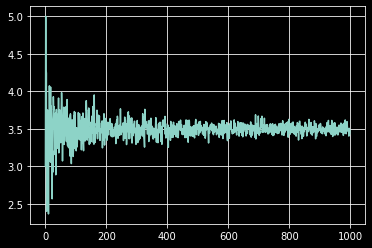

In [25]:
pd.Series(result).plot(grid=True)

In [27]:
result = [dice.sample(n, replace=True).mean() for n in range(1, 1000)]

<AxesSubplot:>

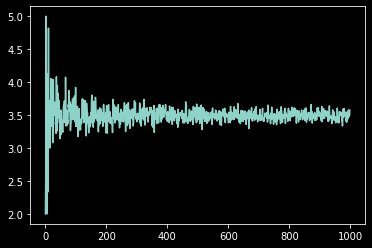

In [30]:
pd.Series([dice.sample(n, replace=True).mean() for n in range(1, 1000)]).plot()

<AxesSubplot:xlabel='sample_size'>

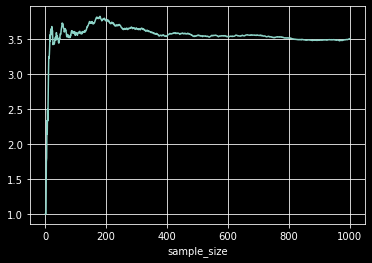

In [44]:
t = dice.sample(1000, replace=True).to_frame().reset_index(drop=True)
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1, 1001)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

*Нормальное*

<AxesSubplot:xlabel='sample_size'>

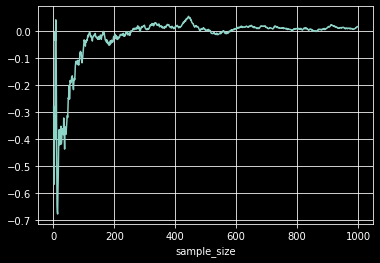

In [46]:
t = pd.DataFrame(np.random.normal(size=1000))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1, 1001)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

*Равномерное*

<AxesSubplot:xlabel='sample_size'>

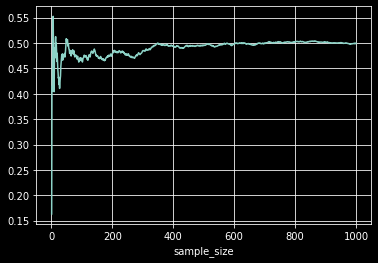

In [145]:
t = pd.DataFrame(np.random.uniform(size=1000))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1, 1001)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

In [146]:
t[0].mean()

0.4995244910122775

*Логнормальное*

<AxesSubplot:ylabel='Count'>

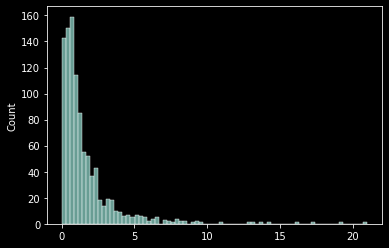

In [48]:
sns.histplot(np.random.lognormal(size=1000))

In [49]:
from scipy.stats import lognorm

<AxesSubplot:ylabel='Count'>

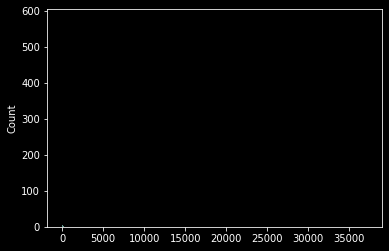

In [150]:
s = 3
r = lognorm.rvs(s, size=1000)
sns.histplot(r)

In [151]:
mean, var, skew, kert = lognorm.stats(s, moments='mvsk')

In [152]:
mean

90.01713130052181

<AxesSubplot:xlabel='sample_size'>

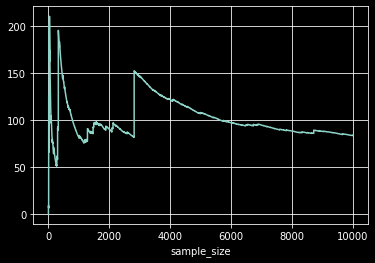

In [85]:
n = 10000
t = pd.DataFrame(lognorm.rvs(s, size=n))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1, n + 1)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True)

In [86]:
t[0].mean()

84.04413309601036

# *Центральная предельная теорема*

In [87]:
# Если мы берём среднее, то с увелечением sample это среднее будет распределено нормально

In [88]:
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

<AxesSubplot:ylabel='Count'>

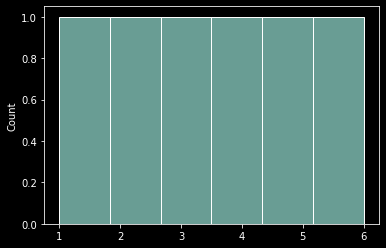

In [93]:
sns.histplot(dice, bins=6)

In [95]:
data = [dice.sample(1000, replace=True).mean() for _ in range(10000)]

<AxesSubplot:ylabel='Count'>

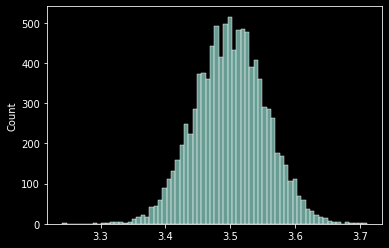

In [96]:
sns.histplot(data)

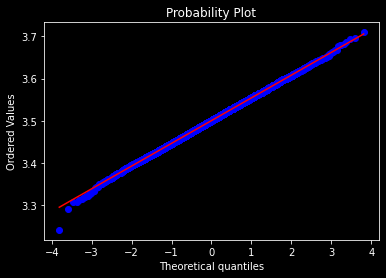

In [97]:
import pylab 
import scipy.stats as stats
 
stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

In [98]:
data = [dice.sample(1000, replace=True).sum() for _ in range(10000)]

<AxesSubplot:ylabel='Count'>

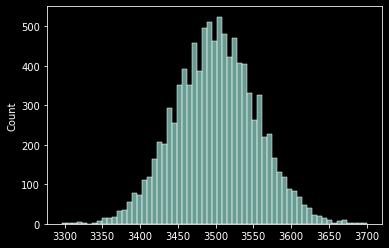

In [99]:
sns.histplot(data)

In [102]:
def d():
  return dice.sample(1, replace=True).values[0]

In [103]:
d()

1

<AxesSubplot:ylabel='Count'>

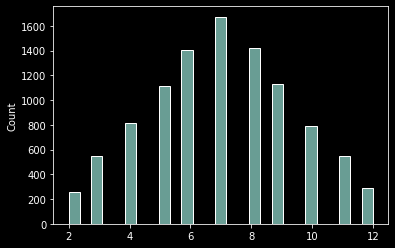

In [108]:
sns.histplot([d() + d() for _ in range(10000)]) # кидаем кубик 2 раза (способов получить 7 много, а других сумм намного меньше => гауссяновское распределение)

In [109]:
# С увеличением размера сэмпла уменьшается стандартное отклонение среднего. Дальше видно, как сужается ось X

In [125]:
data = [dice.sample(100, replace=True).mean() for _ in range(10000)]

<AxesSubplot:ylabel='Count'>

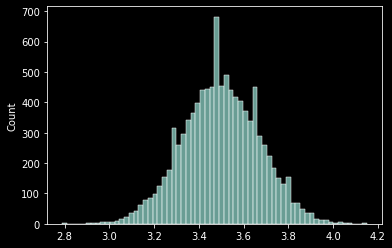

In [126]:
sns.histplot(data)

In [127]:
data = [dice.sample(1000, replace=True).mean() for _ in range(10000)]

<AxesSubplot:ylabel='Count'>

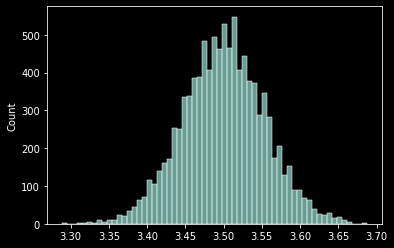

In [128]:
sns.histplot(data)

In [129]:
# То есть, размер выборки ПОНИЖАЕТ ОШИБКУ. Если сэмпл маленький, то гистограмма широкая, если сэмпл увеличивается, 
# то гистограмма сужается, становится более компактной. И это происходит со скоростью единица делить на квадратный корень из размера семпла.

*Логнормальное*

<AxesSubplot:ylabel='Count'>

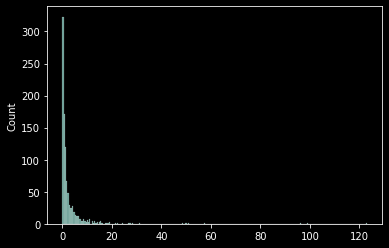

In [134]:
s = 1.5
r = lognorm.rvs(s, size=1000)
sns.histplot(r)

In [138]:
data = [lognorm.rvs(s, size=1000).mean() for _ in range(10000)]

<AxesSubplot:ylabel='Count'>

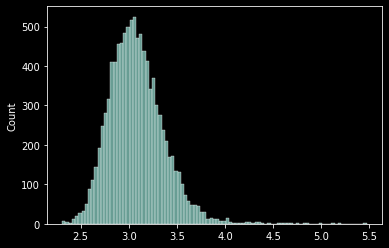

In [139]:
sns.histplot(data)

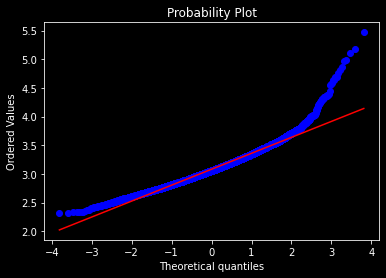

In [140]:
import pylab 
import scipy.stats as stats
 
stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

# *Стандартное отклонение и квадратный корень и n*

In [141]:
from tqdm.notebook import tqdm

In [142]:
result = []
for n in tqdm(range(1,100)):
  result.append(pd.Series([dice.sample(n,replace=True).mean() for _ in range(1000)]).std())

  0%|          | 0/99 [00:00<?, ?it/s]

<AxesSubplot:>

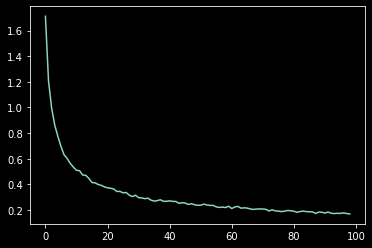

In [143]:
pd.Series(result).plot() # если сэмпл маленький, то гистограмма широкая, если сэмпл увеличивается, 
# то гистограмма сужается, становится более компактной. И это происходит со скоростью единица делить на квадратный корень из размера семпла.

Это обратно пропорционально квадратному корню из n

<ipython-input-144-869917bcd704>:1: RuntimeWarning: divide by zero encountered in true_divide
  pd.Series(1/np.sqrt(range(100))).plot()


<AxesSubplot:>

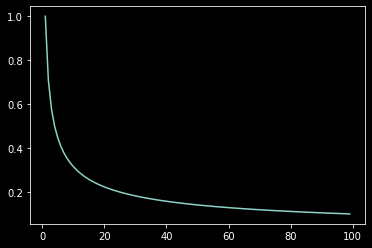

In [144]:
pd.Series(1/np.sqrt(range(100))).plot()